In [474]:
from openpyxl import load_workbook
import numpy as np
import warnings
warnings.filterwarnings('ignore') #将警告滤掉
workbook = load_workbook('data_depression.xlsx')

In [475]:
# 读取数据
sheets = workbook.get_sheet_names()         #从名称获取sheet
booksheet = workbook.get_sheet_by_name('抑郁脑电图')
row=booksheet.max_row   # 数据的行总数
column=booksheet.max_column   # 数据的列总数



In [476]:
# 分别读取特征和类标签

list_values=[]   # 暂存X特征
values=[]
list_y=[]   # 暂存y属性
for r in range(4 , row+1):
    if len(values)==76:
        list_values.append(values)
        values=[]
    
    for c in range(4,10):
        if c==4:
            if (r+15)%19==0:  # 读取HAMD评分
                list_y.append(booksheet.cell(r,c).value)
        
        elif c>= 6:  # 读取另外76个特征
            values.append(booksheet.cell(r,c).value)
        else:
            pass
list_values.append(values)


In [477]:
# 得到x,y
import pandas
x=pandas.DataFrame(list_values)  # 将list转换为pandas中的dataframe,得到x
# print(x)
class_y=[]
for i in list_y:
    if i<=17:
        class_y.append(0)
    else:
        class_y.append(1)
y = pandas.DataFrame(class_y)  # 将list转换为pandas中的dataframe,得到y


In [478]:
# 查看x的信息
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 76 columns):
0     92 non-null float64
1     92 non-null float64
2     92 non-null float64
3     92 non-null float64
4     92 non-null float64
5     92 non-null float64
6     92 non-null float64
7     92 non-null float64
8     92 non-null float64
9     92 non-null float64
10    92 non-null float64
11    92 non-null float64
12    92 non-null float64
13    92 non-null float64
14    92 non-null float64
15    92 non-null float64
16    92 non-null float64
17    92 non-null float64
18    92 non-null float64
19    92 non-null float64
20    92 non-null float64
21    92 non-null float64
22    92 non-null float64
23    92 non-null float64
24    92 non-null float64
25    92 non-null float64
26    92 non-null float64
27    92 non-null float64
28    92 non-null float64
29    92 non-null float64
30    92 non-null float64
31    92 non-null float64
32    92 non-null float64
33    92 non-null float64
34    92 non-

In [480]:
# 查看y的信息
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 1 columns):
0    92 non-null int64
dtypes: int64(1)
memory usage: 864.0 bytes


In [481]:
# 查看x的描述信息
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,...,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,69.003261,35.840217,40.268478,21.192391,64.526087,31.931522,37.963043,19.454348,43.670652,30.498913,...,27.945652,18.170652,33.120652,27.371739,44.185870,22.503261,32.655435,26.042391,46.438043,22.040217
std,46.165827,19.601094,18.311246,11.630712,44.933932,14.804424,13.796844,9.186079,32.932967,15.112563,...,11.294338,9.486561,19.567823,14.104978,19.803438,11.480212,21.699726,12.306821,21.020675,10.235406
min,16.000000,9.100000,12.000000,8.400000,10.600000,8.900000,12.600000,8.400000,8.700000,7.500000,...,13.400000,7.300000,7.900000,6.800000,7.800000,5.900000,8.300000,8.100000,11.600000,5.900000
25%,35.100000,23.600000,28.475000,13.675000,29.075000,21.875000,28.050000,13.675000,22.450000,20.100000,...,19.950000,12.575000,22.425000,17.675000,31.075000,16.475000,19.400000,15.825000,29.975000,15.700000
50%,57.850000,32.550000,36.300000,17.850000,57.100000,30.100000,36.000000,17.300000,37.500000,28.750000,...,26.250000,16.050000,27.900000,24.400000,39.150000,21.000000,25.650000,22.500000,44.150000,20.250000
75%,86.850000,39.700000,48.250000,26.825000,85.950000,37.100000,46.725000,23.750000,53.375000,37.125000,...,32.950000,19.900000,39.875000,31.950000,53.975000,24.500000,38.775000,33.125000,61.500000,26.525000
max,230.400000,131.000000,109.000000,82.100000,229.100000,98.800000,73.600000,61.700000,203.700000,76.400000,...,58.700000,67.400000,116.600000,79.100000,120.400000,85.600000,130.400000,67.500000,119.600000,73.900000


In [483]:
# 使用 SelectKBest进行特征选择，降维处理
from sklearn.feature_selection import SelectKBest
model  = SelectKBest(score_func=mutual_info_classif).fit(x,y)
x_new = model.transform(x)
x_new.shape

(92, 10)

In [484]:
# 对数据进行标准化
from sklearn.preprocessing import scale
x_new = scale(x_new)

In [547]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
#x为数据集的feature熟悉，y为label.
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.3)

In [572]:
# 使用SVM建模
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

clf_rbf = SVC(kernel='rbf',C=10,gamma= 0.5)
clf_rbf.fit(x_train,y_train)
y_rbf_hat = clf_rbf.predict(x_test)

print('svc模型得分: %.4f' % clf_rbf.score(x_test, y_test))

conf_mat = confusion_matrix(y_test, y_rbf_hat)
print("confusion_matrix：\n",conf_mat,'\n')
print(classification_report(y_test, y_rbf_hat))

y_pro = clf_rbf.fit(x_train, y_train).decision_function(x_test)
# 计算AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pro)
auc = metrics.auc(fpr, tpr)
print('auc:',auc)

svc模型得分: 0.7143
confusion_matrix：
 [[17  2]
 [ 6  3]] 

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        19
           1       0.60      0.33      0.43         9

    accuracy                           0.71        28
   macro avg       0.67      0.61      0.62        28
weighted avg       0.69      0.71      0.69        28

auc: 0.7602339181286549


<Figure size 432x288 with 0 Axes>

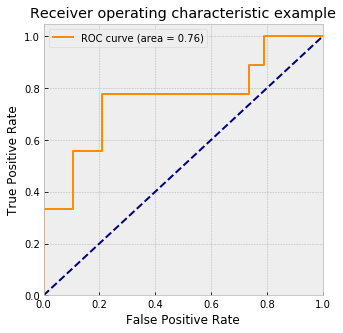

In [573]:
plt.figure()
lw = 2
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="high right")
plt.show()

In [574]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf_rbf,x_new,y,cv=10)
print('交叉验证得分:\n{}'.format(scores))
#计算交叉验证平均分
print('交叉验证平均分:{:.3f}'.format(scores.mean()))

交叉验证得分:
[0.6        0.8        0.8        0.5        0.55555556 0.77777778
 0.66666667 0.77777778 0.875      0.625     ]
交叉验证平均分:0.698


In [576]:
clf_rbf

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

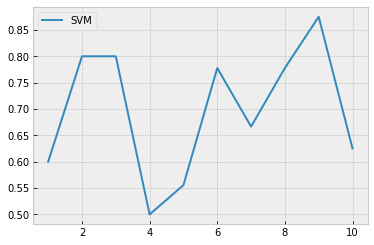

In [578]:
# 交叉验证可视化图
plt.plot(range(1,11),scores,label="SVM")
plt.legend()
plt.show()